In [3]:
library( tidyverse )
library( Amelia )

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 2.2.1     ✔ purrr   0.2.4
✔ tibble  1.3.4     ✔ dplyr   0.7.4
✔ tidyr   0.7.2     ✔ stringr 1.2.0
✔ readr   1.1.1     ✔ forcats 0.2.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Loading required package: Rcpp
## 
## Amelia II: Multiple Imputation
## (Version 1.7.4, built: 2015-12-05)
## Copyright (C) 2005-2018 James Honaker, Gary King and Matthew Blackwell
## Refer to http://gking.harvard.edu/amelia/ for more information
## 


In [113]:
df <- read.csv( '../data/7_segmentation/country-data.csv' )

In [114]:
cat <- read.csv( '../data/7_segmentation/variables-catalog.csv' )

## Step 1: Business understanding
The key business question to be answered in this project is: 'What cluster of countries in the dataset are most similar to the United States'.
The data needed to answer this question would contain a list of countries with as many demographic factors as could be gathered, as close to the present time as possible. This would allow us to compare other countries to the characteristics of the United States, and select the group of countries most similar.

## Step 2: Clean the data

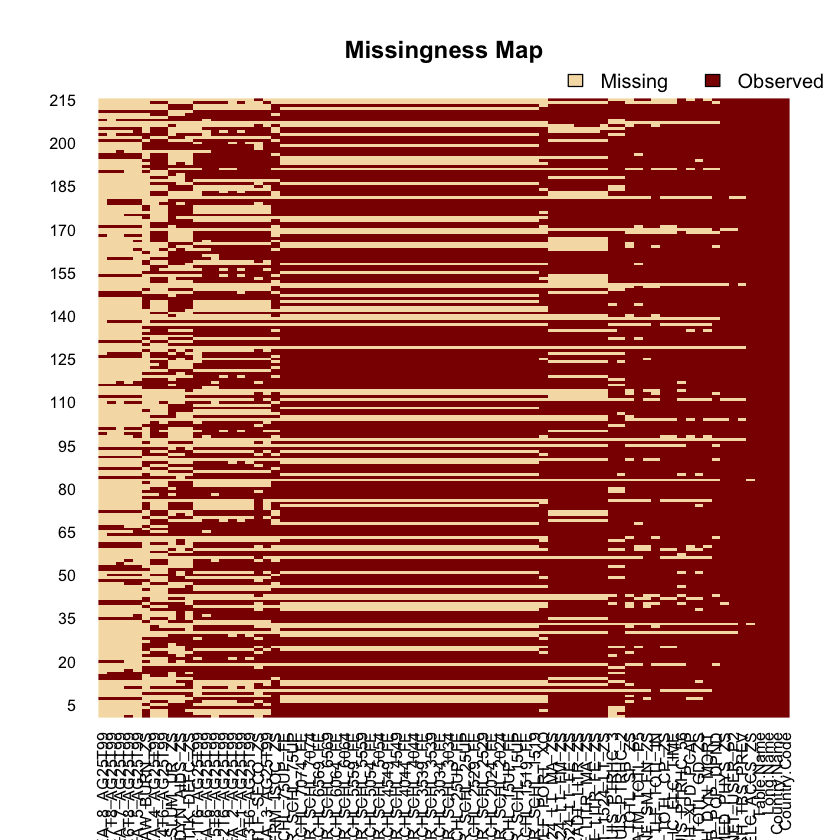

In [28]:
missmap( df )

Check for countries with more than 25 missing data points.

In [115]:
df$missingness_cnt <- apply(df, 1, function(x) sum(is.na(x)))

In [116]:
df <- df[df$missingness_cnt < 25,]

In [117]:
nrow( df )

[1] 144

Remove any variables not relevant to the analysis. These variable categories include Background and Health.

In [118]:
cat <- cat %>%
    select( 1:3 )

In [119]:
tail( cat )

,Series.Code,Category,Definition
71,IC_TAX_TOTL_CP_ZS,Economic,"Total tax rate measures the amount of taxes and mandatory contributions payable by businesses after accounting for allowable deductions and exemptions as a share of commercial profits. Taxes withheld (such as personal income tax) or collected and remitted to tax authorities (such as value added taxes, sales taxes or goods and service taxes) are excluded."
72,TM_TAX_MANF_SM_FN_ZS,Economic,Simple mean most favored nation tariff rate is the unweighted average of most favored nation rates for all products subject to tariffs calculated for all traded goods. Data are classified using the Harmonized System of trade at the six- or eight-digit level. Tariff line data were matched to Standard International Trade Classification (SITC) revision 3 codes to define commodity groups. Manufactured products are commodities classified in SITC revision 3 sections 5-8 excluding division 68.
73,SL_EMP_TOTL_SP_ZS,Economic,Employment to population ratio is the proportion of a country's population that is employed. Ages 15 and older are generally considered the working-age population.
74,UIS_PTRHC_2,Education_PTR,"Average number of pupils per teacher at a given level of education, based on headcounts of both pupils and teachers. Divide the total number of pupils enrolled at the specified level of education by the number of teachers at the same level. In computing and interpreting this indicator, one should take into account the existence of part-time teaching, school-shifts, multi-grade classes and other practices that may affect the precision and meaningfulness of pupil-teacher ratios. When feasible, the number of part-time teachers is converted to 'full-time equivalent' teachers; a double-shift teacher is counted twice, etc. Teachers are defined as persons whose professional activity involves the transmitting of knowledge, attitudes and skills that are stipulated in a formal curriculum programme to students enrolled in a formal educational institution."
75,UIS_PTRHC_3,Education_PTR,"Average number of pupils per teacher at a given level of education, based on headcounts of both pupils and teachers. Divide the total number of pupils enrolled at the specified level of education by the number of teachers at the same level. In computing and interpreting this indicator, one should take into account the existence of part-time teaching, school-shifts, multi-grade classes and other practices that may affect the precision and meaningfulness of pupil-teacher ratios. When feasible, the number of part-time teachers is converted to 'full-time equivalent' teachers; a double-shift teacher is counted twice, etc. Teachers are defined as persons whose professional activity involves the transmitting of knowledge, attitudes and skills that are stipulated in a formal curriculum programme to students enrolled in a formal educational institution."
76,UIS_PTRHC_56,Education_PTR,"Average number of pupils per teacher at a given level of education, based on headcounts of both pupils and teachers. Divide the total number of pupils enrolled at the specified level of education by the number of teachers at the same level. In computing and interpreting this indicator, one should take into account the existence of part-time teaching, school-shifts, multi-grade classes and other practices that may affect the precision and meaningfulness of pupil-teacher ratios. When feasible, the number of part-time teachers is converted to 'full-time equivalent' teachers; a double-shift teacher is counted twice, etc. Teachers are defined as persons whose professional activity involves the transmitting of knowledge, attitudes and skills that are stipulated in a formal curriculum programme to students enrolled in a formal educational institution."


In [106]:
ncol( df )

[1] 81

In [120]:
nrow( cat )

[1] 76

In [121]:
cat <- cat[cat$Category != 'Health', ]

In [124]:
cat <- cat[cat$Category != 'Background', ]

In [122]:
cat <- droplevels( cat )

In [126]:
cols.keep <- cat$Series.Code

In [129]:
df <- select( df, cols.keep )

Done.